# Visualizing distributions of data

- An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

## Plotting univariate histograms

In [2]:
import seaborn as sns

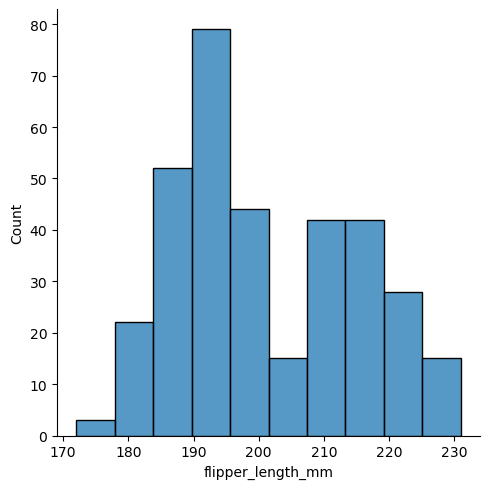

In [3]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

- This plot immediately affords a few insights about the flipper_length_mm variable. For instance, we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.

## Choosing the bin size

- The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. By default, displot()/histplot() choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the binwidth parameter:

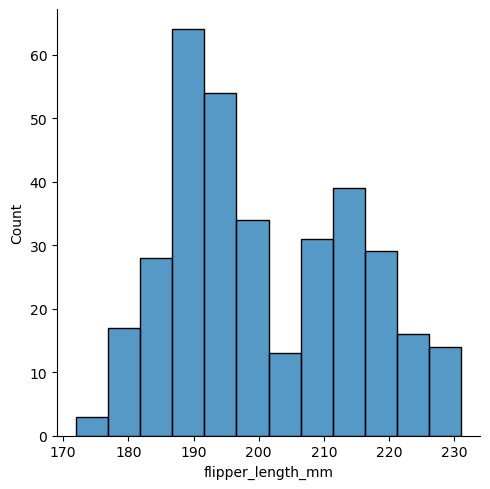

In [5]:
sns.displot(penguins, x="flipper_length_mm", binwidth=5)

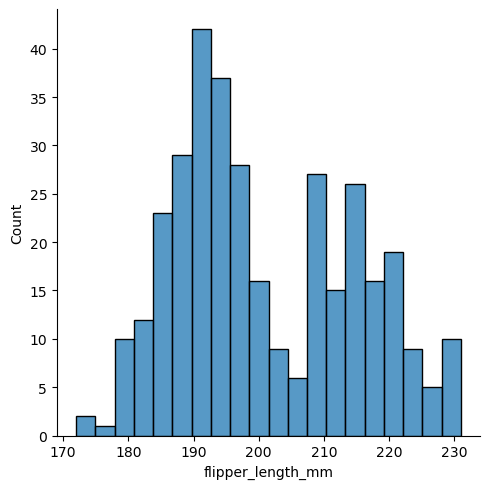

In [6]:
# In other circumstances, it may make more sense to specify the number of bins, rather than their size:
sns.displot(penguins, x="flipper_length_mm", bins=20)

- One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

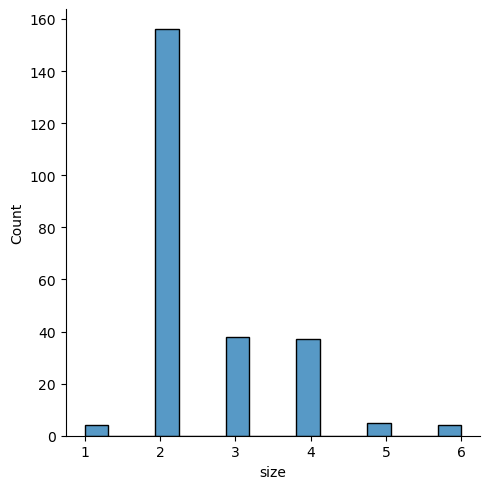

In [7]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

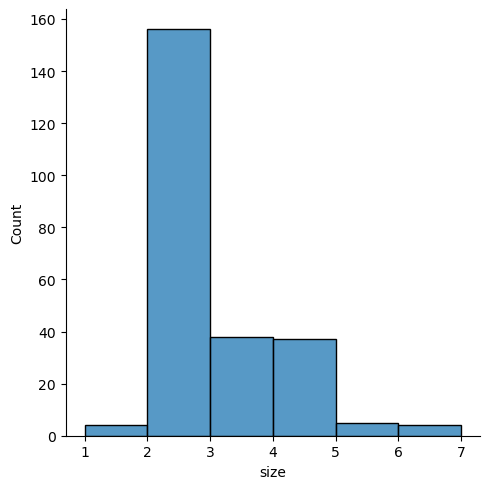

In [8]:
# One approach would be to specify the precise bin breaks by passing an array to bins:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

- This can also be accomplished by setting discrete=True, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.


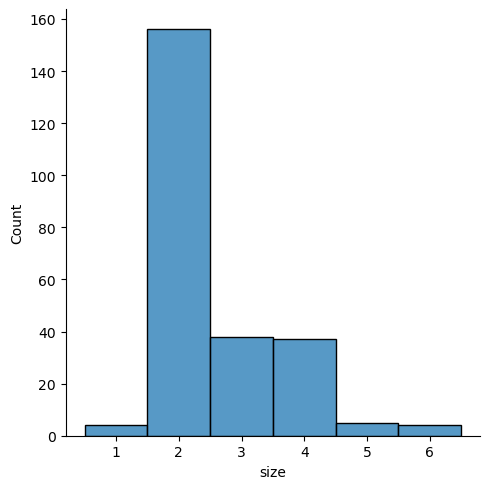

In [9]:
sns.displot(tips, x="size", discrete=True)

- It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

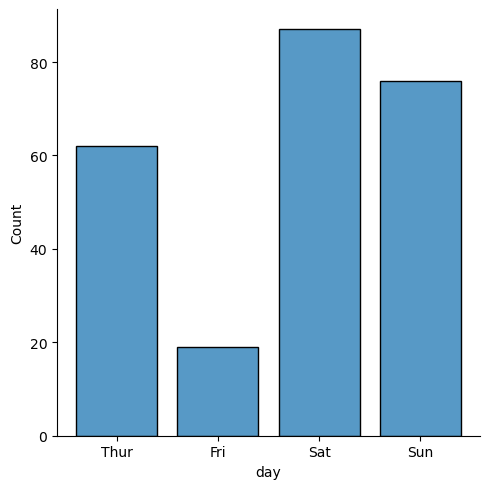

In [13]:
sns.displot(tips, x="day", shrink=.8)

# Conditioning on other variables
- Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish them by color:

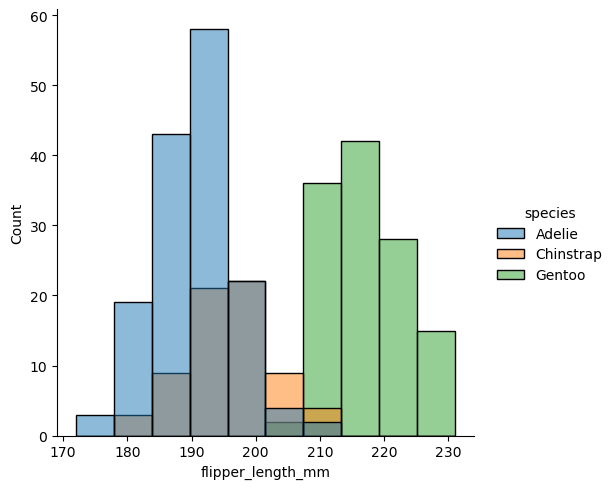

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

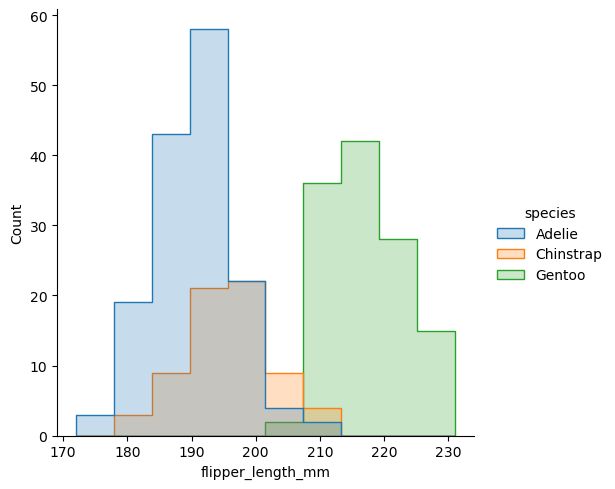

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

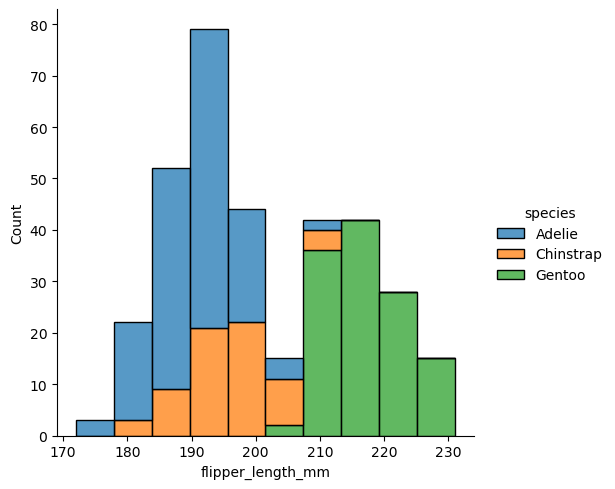

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

- The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

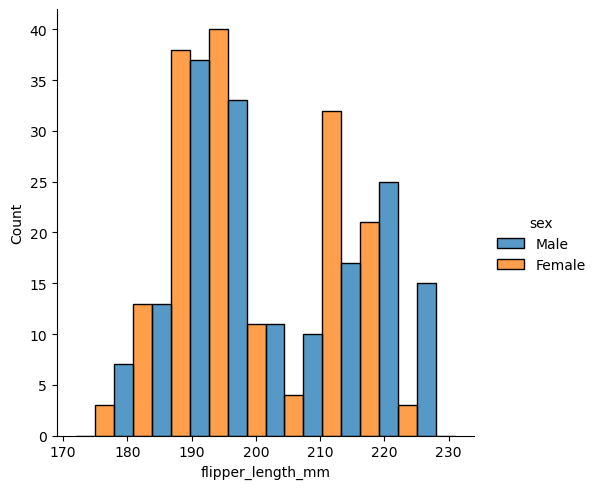

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

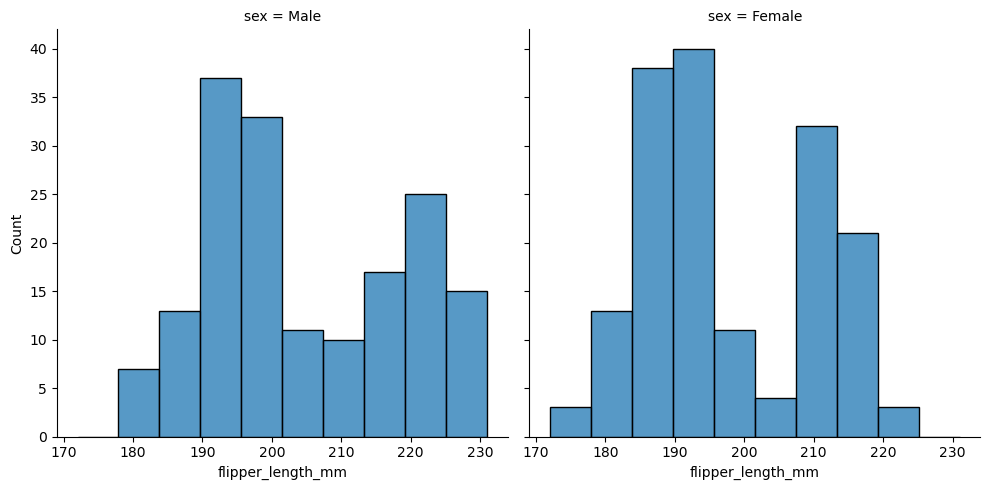

In [18]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

- None of these approaches are perfect, and we will soon see some alternatives to a histogram that are better-suited to the task of comparison.

## Normalized histogram statistics
- Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

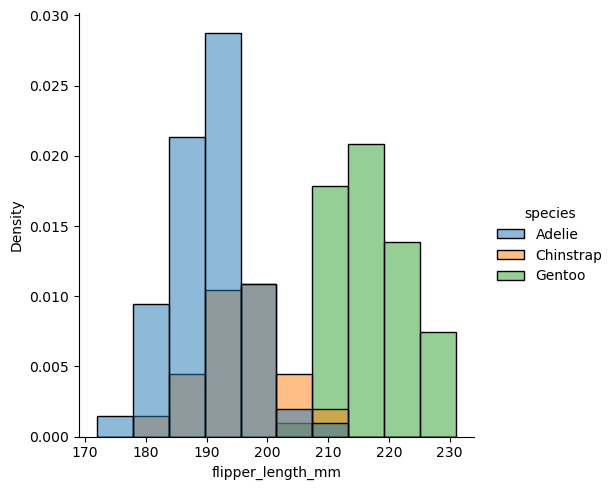

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

- By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting common_norm=False, each subset will be normalized independently:

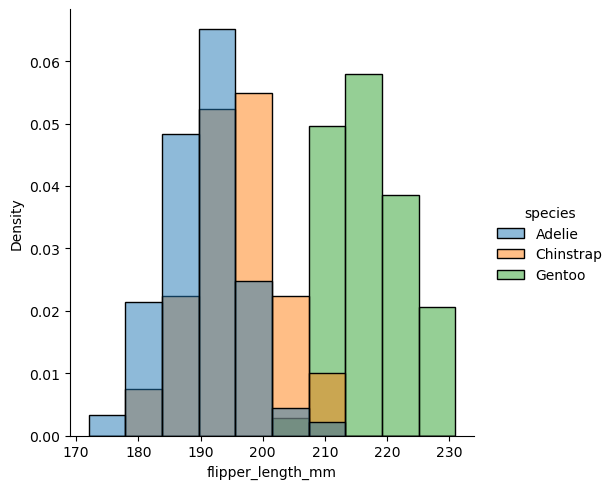

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

- Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their heights sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

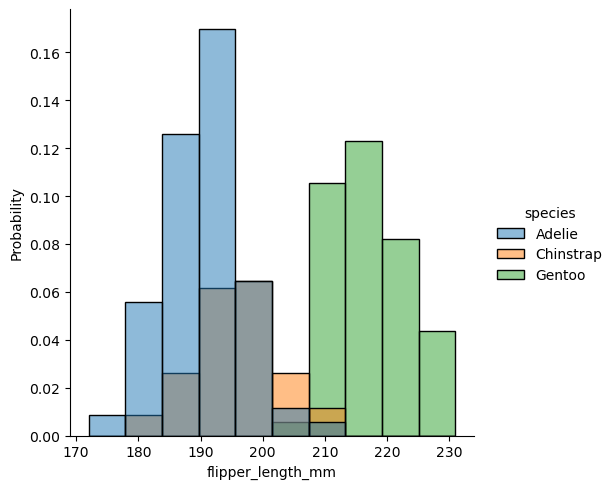

In [21]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

# Kernel density estimation
- A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

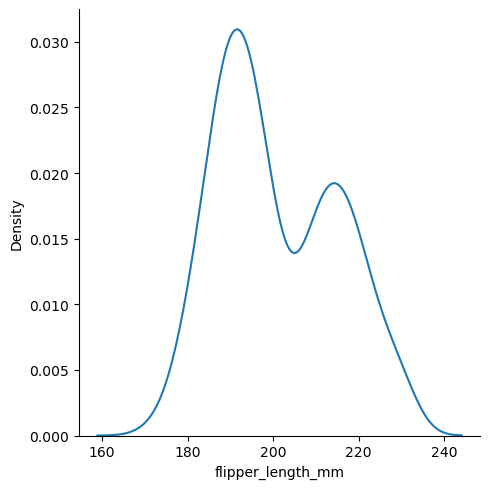

In [22]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

# Choosing the smoothing bandwidth
- Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

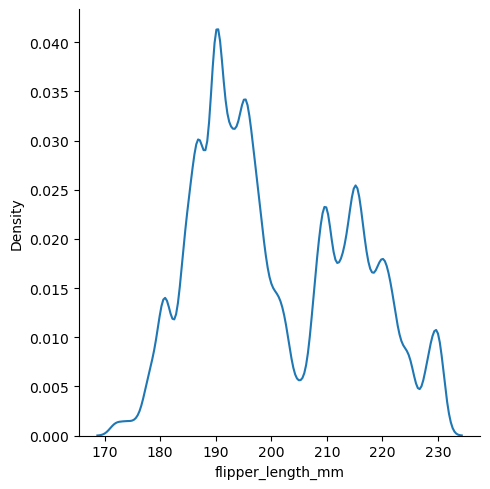

In [23]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

- Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

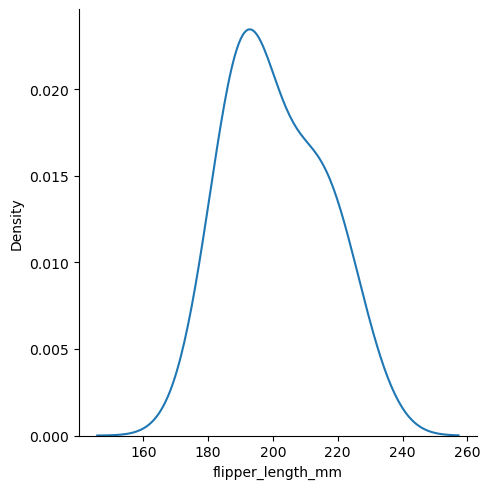

In [24]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

# Conditioning on other variables
- As with histograms, if you assign a hue variable, a separate density estimate will be computed for each level of that variable:

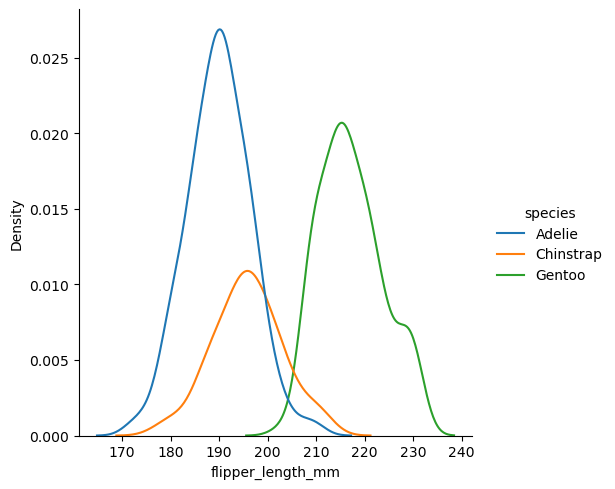

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

- In many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the KDE as well, however:

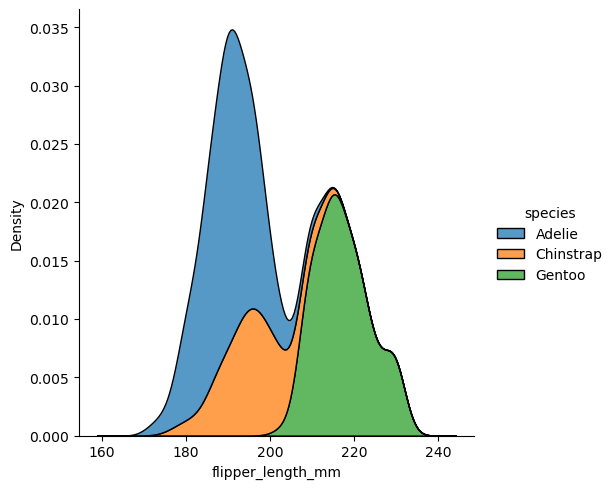

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

- Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the individual densities are easier to resolve.

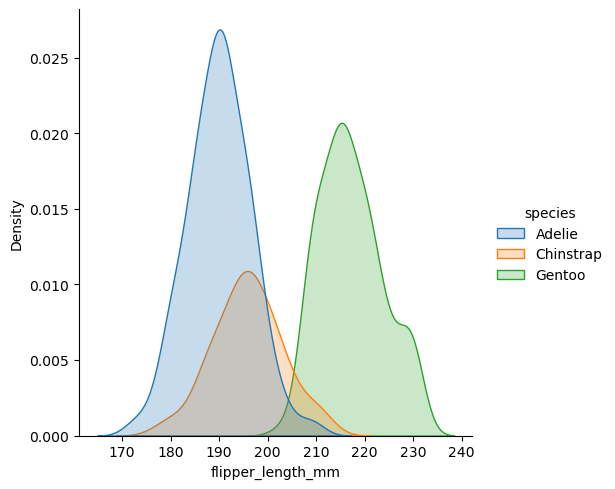

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

## Kernel density estimation pitfalls
- KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

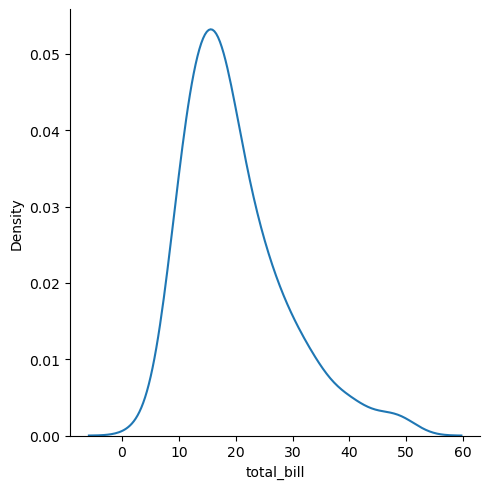

In [30]:
sns.displot(tips, x="total_bill", kind="kde")

- This can be partially avoided with the cut parameter, which specifies how far the curve should extend beyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artificially low at the extremes of the distribution:

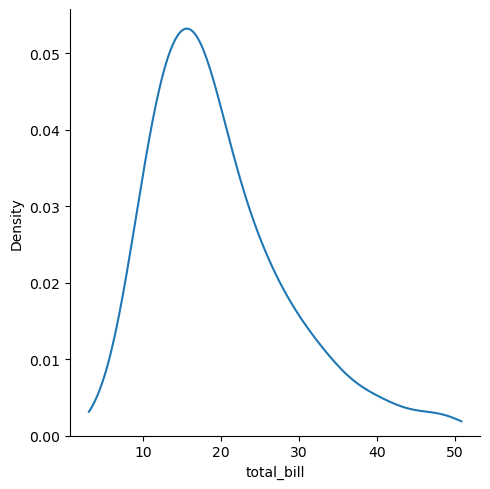

In [31]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

- The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

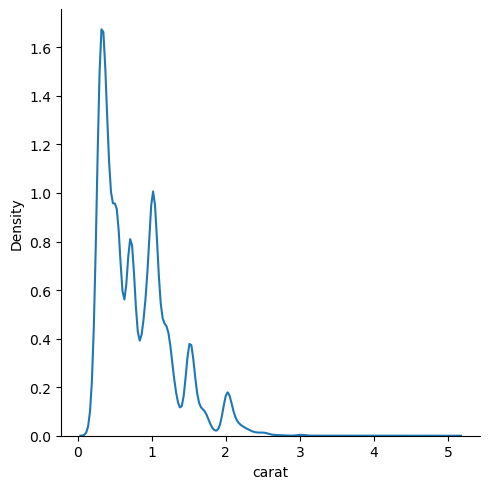

In [32]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

- While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

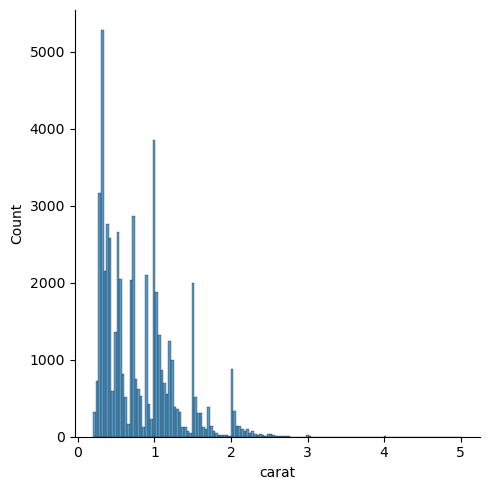

In [33]:
sns.displot(diamonds, x="carat")

- As a compromise, it is possible to combine these two approaches. While in histogram mode, displot() (as with histplot()) has the option of including the smoothed KDE curve (note kde=True, not kind="kde"):

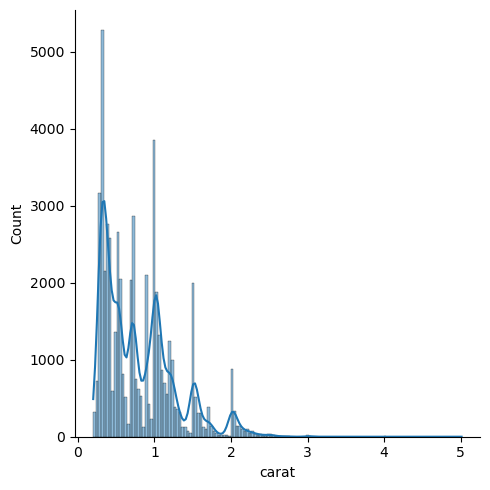

In [34]:
sns.displot(diamonds, x="carat", kde=True)

## Empirical cumulative distributions
- A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

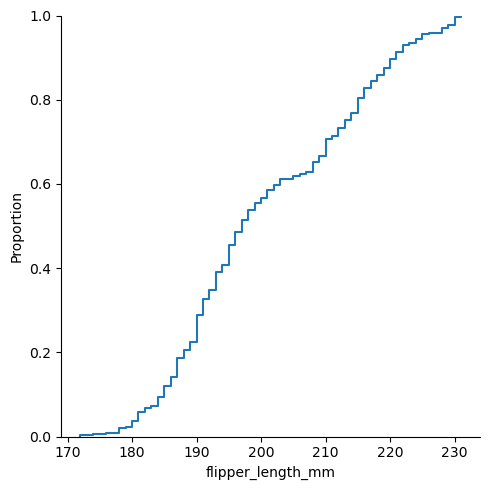

In [35]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

- The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

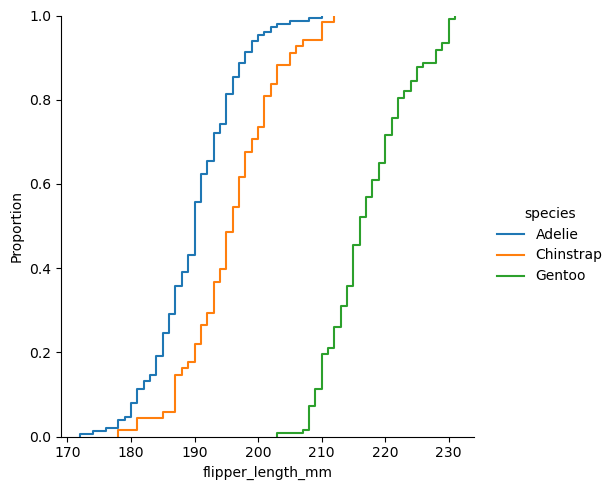

In [36]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

- The major downside to the ECDF plot is that it represents the shape of the distribution less intuitively than a histogram or density curve. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes. Nevertheless, with practice, you can learn to answer all of the important questions about a distribution by examining the ECDF, and doing so can be a powerful approach.

## Visualizing bivariate distributions
- All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution:

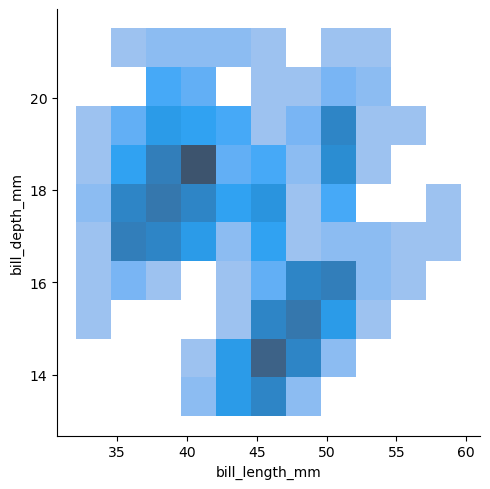

In [37]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

- A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a heatmap()). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density:

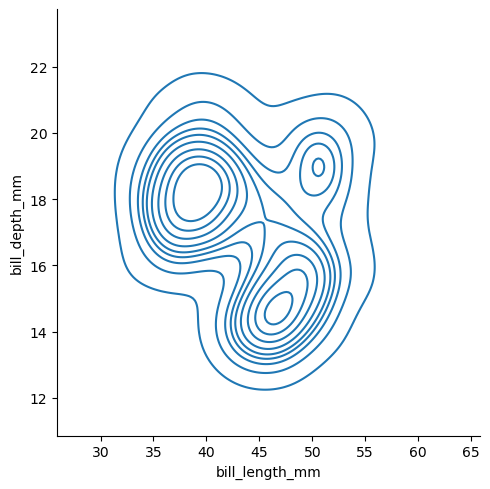

In [38]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

- Assigning a hue variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

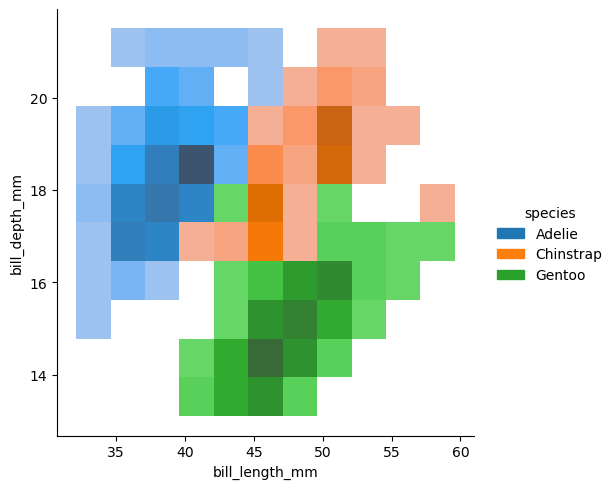

In [39]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

- The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

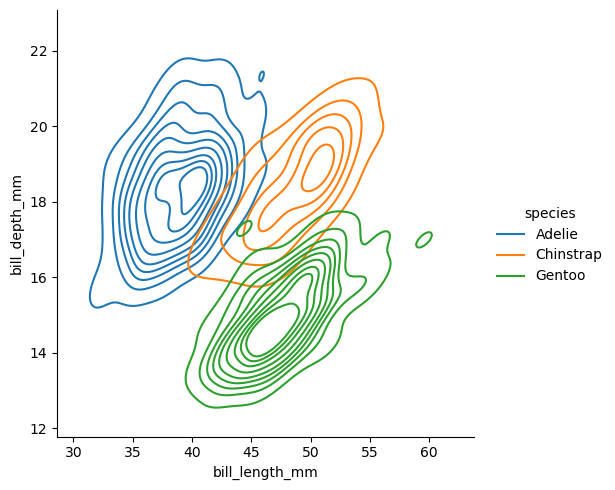

In [40]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

- Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

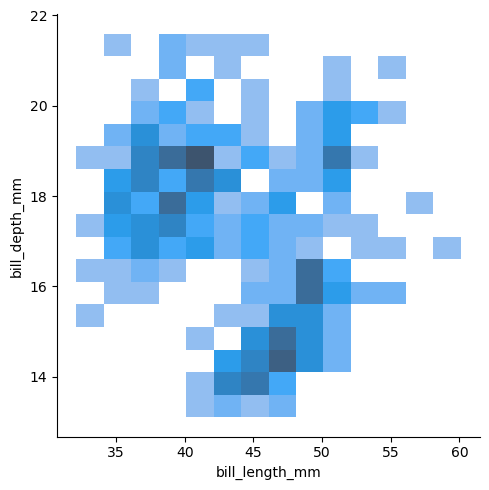

In [41]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

- To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:

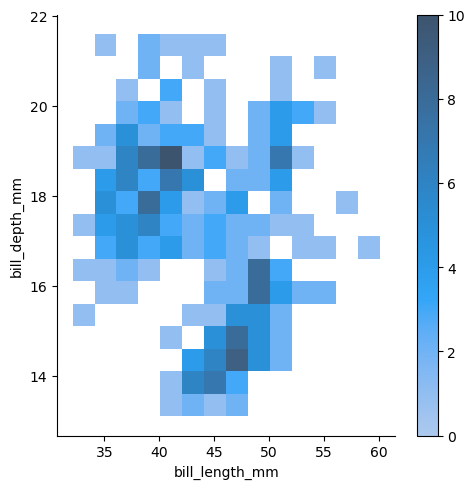

In [42]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

- The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at iso-proportions of the density, meaning that each curve shows a level set such that some proportion p of the density lies below it. The p values are evenly spaced, with the lowest level contolled by the thresh parameter and the number controlled by levels:

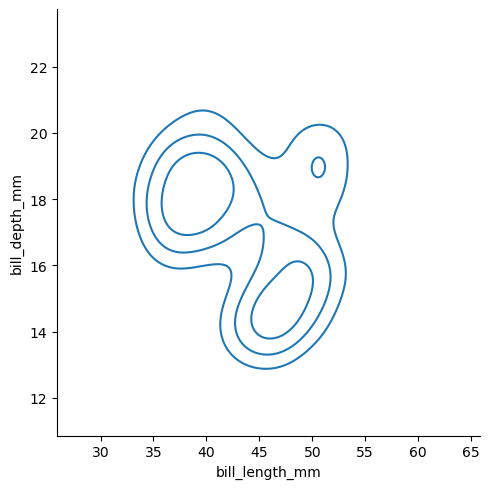

In [43]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

- The levels parameter also accepts a list of values, for more control:

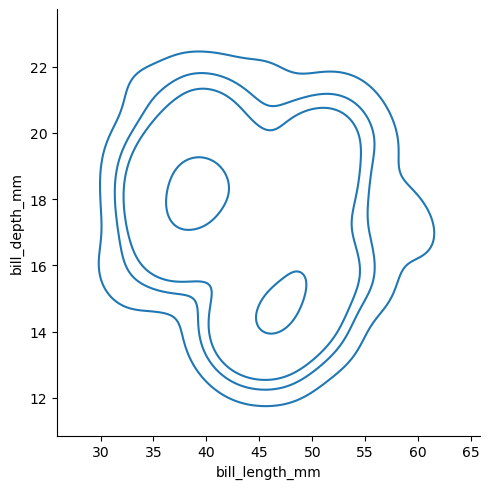

In [44]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

- The bivariate histogram allows one or both variables to be discrete. Plotting one discrete and one continuous variable offers another way to compare conditional univariate distributions:

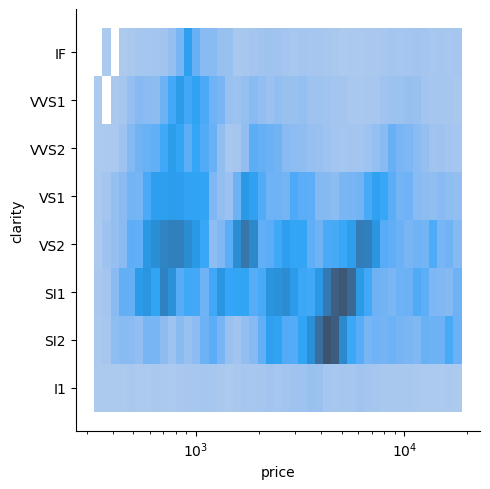

In [45]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

- In contrast, plotting two discrete variables is an easy to way show the cross-tabulation of the observations:

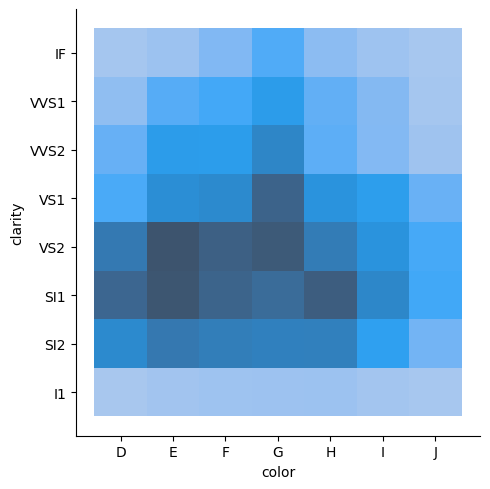

In [46]:
sns.displot(diamonds, x="color", y="clarity")

## Distribution visualization in other settings

#### Plotting joint and marginal distributions
The first is jointplot(), which augments a bivariate relational or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():

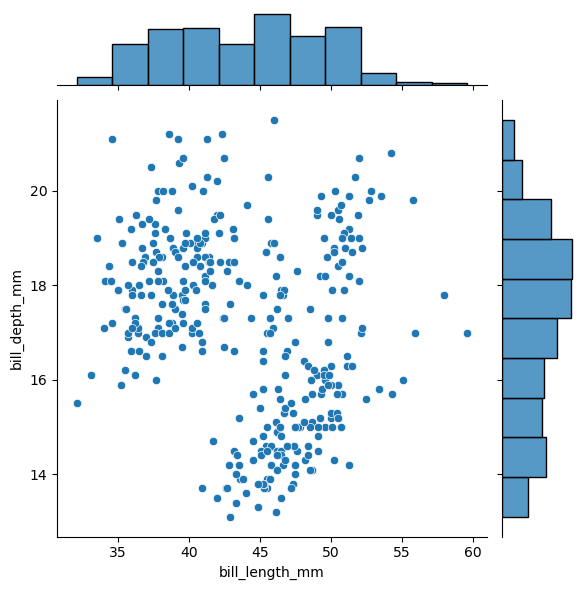

In [47]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

- Similar to displot(), setting a different kind="kde" in jointplot() will change both the joint and marginal plots the use kdeplot():

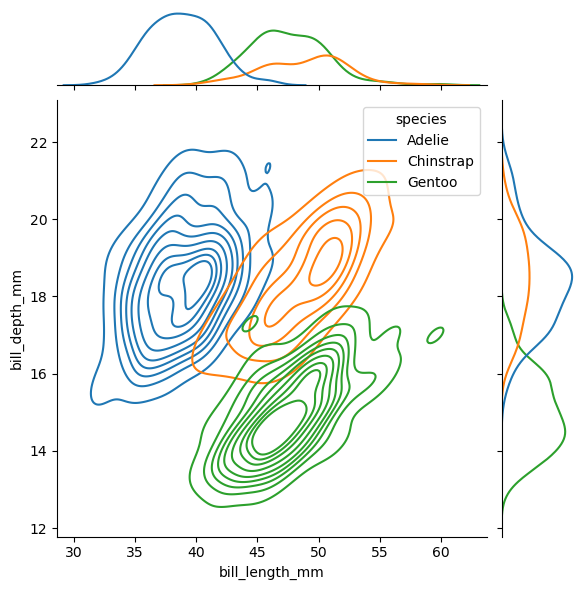

In [48]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

- jointplot() is a convenient interface to the JointGrid class, which offeres more flexibility when used directly:

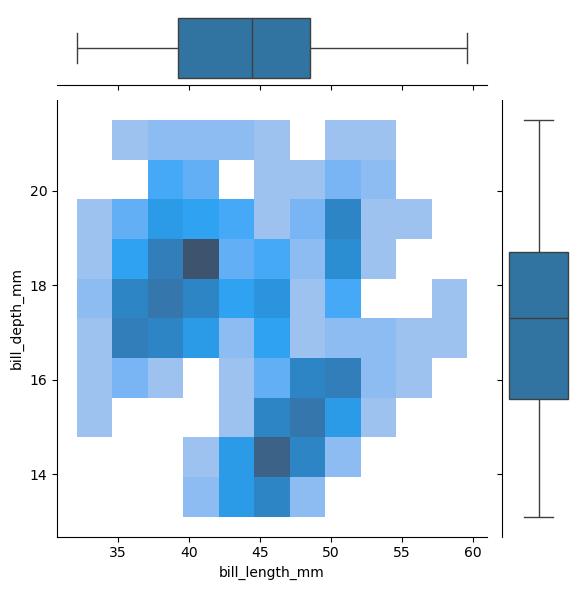

In [49]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

- A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into displot():

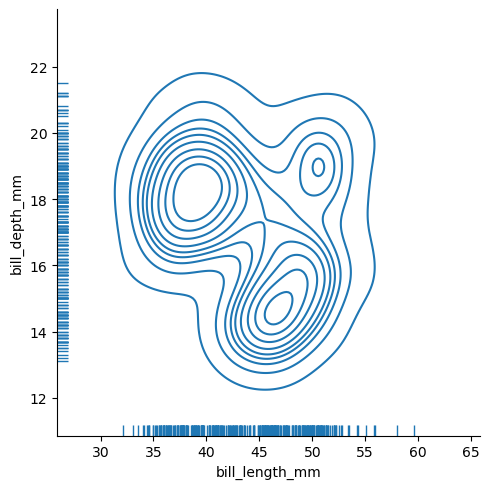

In [50]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

- And the axes-level rugplot() function can be used to add rugs on the side of any other kind of plot:

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

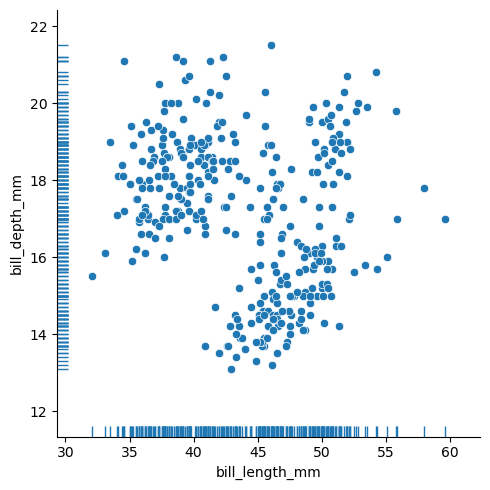

In [51]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

## Plotting many distributions
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships

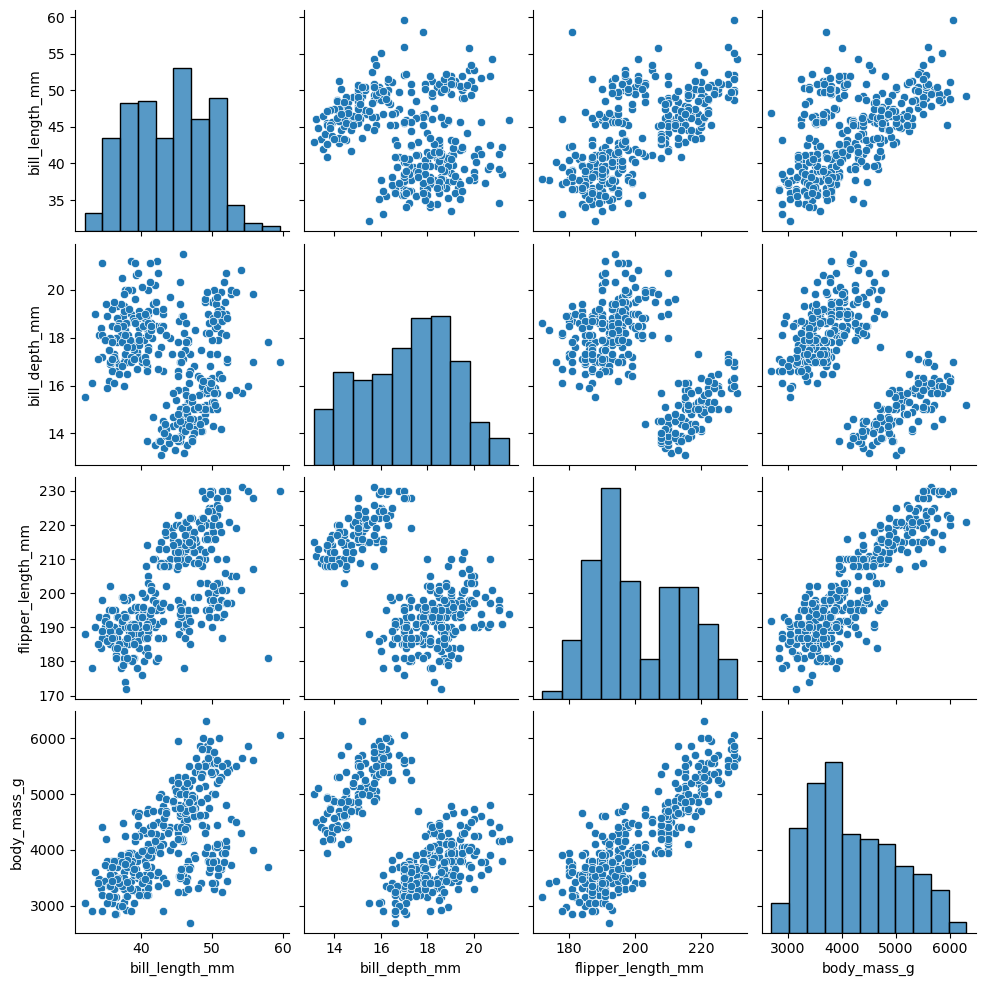

In [52]:
sns.pairplot(penguins)

- As with jointplot()/JointGrid, using the underlying PairGrid directly will afford more flexibility with only a bit more typing:

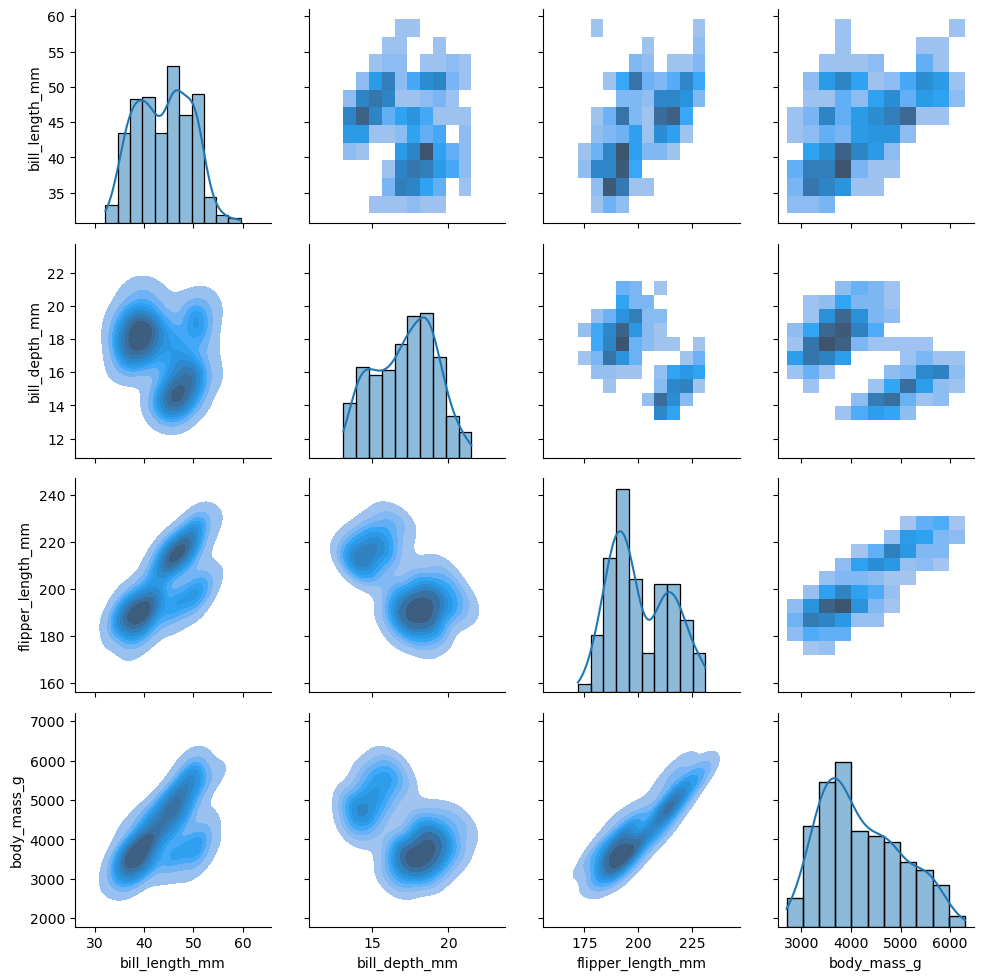

In [53]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)